<a href="https://colab.research.google.com/github/tako21ttp/tako21aiko/blob/main/Python%20Scripts/%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0%E3%81%AE%E5%AE%9F%E8%A3%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[機械学習の入り口「線形回帰」の実装を Python × NumPy で体験](https://zero2one.jp/learningblog/machine-learning-linear-regression/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

「30人の身長と体重のデータ」をNumPy配列で作成します。

In [2]:
# X：30個の入力データ（身長 [cm]）
X = np.array([131, 132, 132, 133.5, 135, 142, 143.8, 144, 148, 149, 150, 152, 153, 157, 158, 158, 162, 164, 166, 169, 169.5, 170, 172, 173, 173, 176, 180, 184, 186, 190])

# Y：Xに対応する正解データ（体重 [kg]）
Y = np.array([31, 28, 35, 40, 31, 40, 42, 45, 50, 48, 56, 50, 51, 56, 65, 61, 66, 61.5, 69, 71, 63, 68, 80, 74, 76.5, 82, 68, 75, 92, 90])

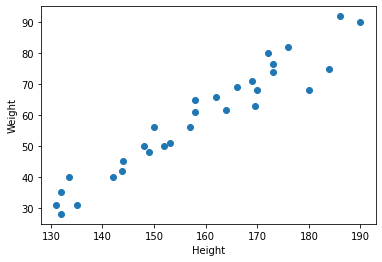

In [3]:
#グラフ表示
plt.scatter(X, Y) #散布図
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

実は、このデータのまま学習すると上手くいかない可能性があります。それはデータのスケール（値の範囲）が違うためです。先ほど用意したデータを見ると、
・身長：約130～190 cm
・体重：約30～90 kg
と桁が一つ違うことがわかります。このようにデータのスケールに偏りがあると上手く学習できないため、事前にスケールを揃えておくことが必要です。

データのスケールを揃える処理を一般に「正規化」といい、今回はその中でもよく使われる「標準化」を行います。

標準化の計算方法について、詳しくは[「データの前処理：正規化・標準化のプロセスをプログラムで体験」](https://zero2one.jp/learningblog/data-normalization-standardization/)で説明しているので、ここでは「データのスケールを揃えた方がいい」程度の理解でかまいません。

In [4]:
#標準化する関数を定義
def stand(x):
    M=x.mean()
    S=x.std()
    x=(x-M)/S
    return x

In [5]:
X=stand(X) #Xを標準化
Y=stand(Y) #yを標準化

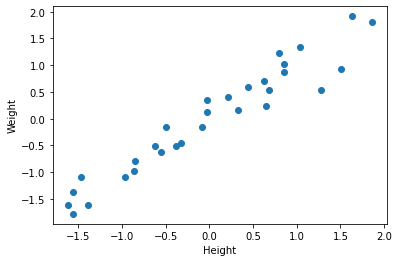

In [6]:
#グラフ表示
plt.scatter(X, Y) #散布図
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

データXとYの範囲がどちらもだいたい（-2～2）になったと思います。これでデータのスケールを揃えることができたので、いよいよ線形回帰に入っていきましょう。

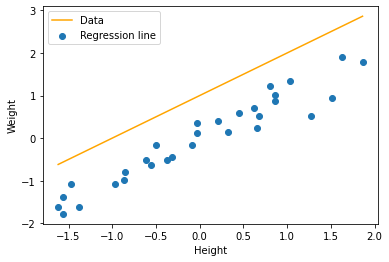

In [7]:
#初期値を1としてパラメータを設定
a=1
b=1

#仮説を定義
h=a*X+b

#データと仮説を重ねてプロットします。
plt.scatter(X, Y) #データをプロット
plt.plot(X, h, c='orange') #仮説をプロット
plt.legend((u'Data',u'Regression line')) #凡例
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

パラメータの初期値を1としましたが、まったくデータに重なっていません。ここから、学習によって適切なaとbを求めていきます。

In [13]:
#データ数
m=X.shape[0]

#目的関数の計算
J = (1/(2*m))*((h-Y)**2).sum() #sum()が式中のΣに対応

print(f"初期値の（a,b）での目的関数の値：{J:.08f}")

初期値の（a,b）での目的関数の値：0.53668243


ここからはいよいよ仮説を調整していくパラメータ更新(最急降下法)です。
目的関数の値をもとにどうやってaとbを更新すればよいか考えてみましょう。

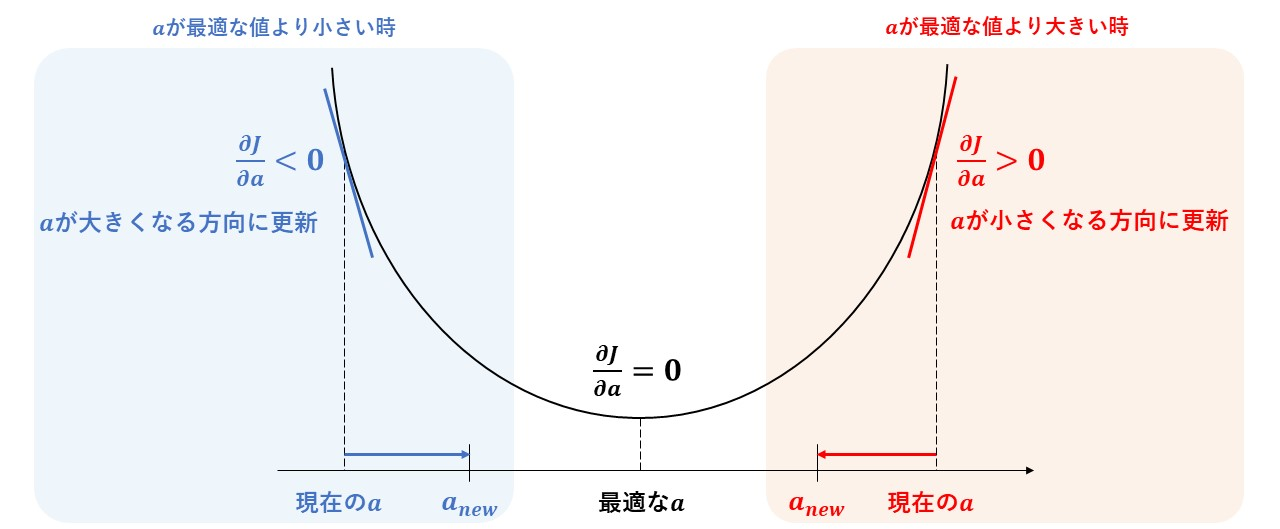

この最急降下法の式を実装するためにまず勾配部分（目的関数の微分）を計算してみましょう。パラメータaとbのそれぞれについて

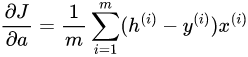

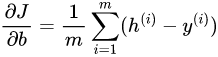

学習ではこれを何回も繰り返します。繰り返し回数（イテレーションといいます）と学習率αを指定して、for文を使って実装しましょう。

In [20]:
#繰り返し回数
iterations = 1000
#学習率
alpha=0.01

In [21]:
#目的関数の値を保存しておくためのリスト
cost=[]

In [22]:
#初期値を1としてパラメータを設定
a=1
b=1

#仮説を定義
h=a*X+b

In [24]:
#学習（指定した繰り返し回数だけパラメータを更新）
for iter in range(iterations):
    #パラメータを更新
    a = a - (alpha / m)*((h - Y)*X).sum()
    b = b - (alpha / m)*(h - Y).sum()

    #更新後のパラメータで仮説と目的関数を計算
    h=a*X+b
    J = (1/(2*m))*((h-Y)**2).sum()

    #学習によって目的関数の値がどう変化しているかを後で見れるように、現在の目的関数の値をリストに保存します
    cost.append(J)

In [25]:
# 学習した結果を表示
print("学習後のa: %f,"% a)
print("学習後のb: %f,"% b)
print("学習後の目的関数の値: %f,"% J) 

学習後のa: 0.963318,
学習後のb: 0.000000,
学習後の目的関数の値: 0.036010,


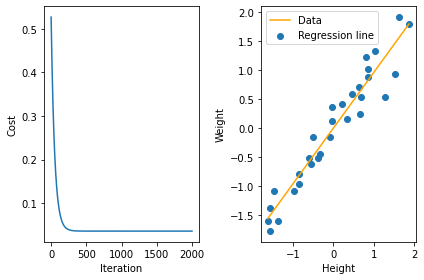

In [26]:
#目的関数の値の推移と仮説のグラフを並べて表示する
fig = plt.figure()
#1つ目のグラフ
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(cost) #目的関数の値を保存したリストをプロット
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Cost')
#2つ目のグラフ
ax2 = fig.add_subplot(1, 2, 2) #データと仮説を重ねてプロット
ax2.scatter(X, Y) #データをプロット
h=a*X+b #最終的な仮説
ax2.plot(X, h, c='orange') #仮説をプロット
ax2.legend((u'Data',u'Regression line')) #凡例
ax2.set_xlabel('Height')
ax2.set_ylabel('Weight')

fig.tight_layout()
fig.show()

学習率を0.01、繰り返し回数を1000回として学習してみました。目的関数の値の推移を見ると、パラメータを更新するたびに目的関数の値が下がっていっていることがわかると思います。

最後に、得られた回帰直線によって未知のデータに対する予測を行ってみましょう。

In [28]:
def stand_2(X):
    M=X.mean() #平均
    S=X.std() #標準偏差
    X=(X-M)/S #標準化
    return M,S

In [29]:
#以下、未知データに対する予測

x=170 #未知の入力値（身長）

X_m,X_s=stand_2(X) #Xを標準化
Y_m,Y_s=stand_2(Y) #yを標準化

x_=(x-X_m)/X_s #入力値を標準化

標準化された値を元のスケールに戻すために訓練データの平均、分散が必要なので、初めにそれを求めめる部分があります。

In [30]:
#学習で得られたパラメータで仮説を定義
h_=a*x_+b 

h=h_*Y_s+Y_m #得られた予測値は標準化された値なので、元のスケールに戻す

print('身長',x,'cm の人の体重は',round(h, 1),'kg') #round()は四捨五入を行う処理です。

身長 170 cm の人の体重は 163.8 kg


# EOF